In [34]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [35]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    number3: int
    operation2: str
    number4: int
    finalNumber1: int
    finalNumber2: int

In [36]:
def adder1(state:AgentState) -> AgentState:
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor1(state:AgentState) -> AgentState:
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def adder2(state:AgentState) -> AgentState:
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor2(state:AgentState) -> AgentState:
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decide_next_node1(state:AgentState) -> AgentState:
    if state["operation1"] == "+":
        return "addition_operation1"
    elif state["operation1"] == "-":
        return "subtraction_operation1"
    
def decide_next_node2(state:AgentState) -> AgentState:
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [37]:
graph = StateGraph(AgentState)

graph.add_node("add_node1", adder1)
graph.add_node("sub_node1", subtractor1)
graph.add_node("add_node2", adder2)
graph.add_node("sub_node2", subtractor2)
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        "addition_operation1": "add_node1",
        "subtraction_operation1": "sub_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("sub_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "sub_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)

app = graph.compile()

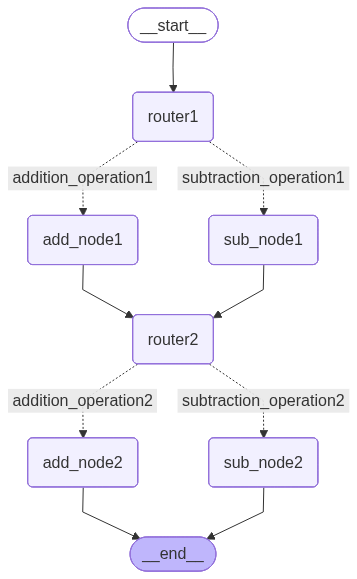

In [38]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
initial_state1 = AgentState(number1 = 10, operation1 = "-", number2 = 5, number3 = 7, operation2 = "+", number4 = 2, finalNumber1 = 0, finalNumber2 = 0)
print(app.invoke(initial_state1))

{'number1': 10, 'operation1': '-', 'number2': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber1': 5, 'finalNumber2': 9}
